<a href="https://colab.research.google.com/github/Mohan75489/DeepLearning_PyTorch/blob/main/Tensor_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch and Some operations of Tensors

PyTorch is an tensor library that can run both on CPU and GPU. It can also do Autograd unlike numpy.

- arange (from Creation operations)
- tensor_split (from Slicing operation)
- bernoulli (from Random sampling operation)
- floor (from Math operations)
- block_diag (from Other operations)

Before we begin, let's install and import PyTorch

In [ ]:
# Import torch and other required modules
import torch

## arange operation
- This operation allows us to create a **"1-D"** tensor with elements ranging from given *Start* to *End* (excluding End value) with custom *Step* (if not default step is 1).
-Structure: torch.arange(Start,End,Step)


In [ ]:
# Example 1 - working (change this)
torch.arange(1,5,2)

tensor([1, 3])

- Given Start is '1', End is '5', and step is 2.
- So, first element should be Start, which is 1.
-Second element should be Start+Step = 1+2 =3.
-Next element should be 3+2=6, but is out of given range.


In [ ]:
# Example 2 - working
torch.arange(1,8,1)

tensor([1, 2, 3, 4, 5, 6, 7])

- Given Start is '1', End is '8', and step is 1.
- So, first element should be Start, which is 1.
-Second element should be Start+Step = 1+1 =2.
-It goes on till 7.
-But for 8 is not included, because it is End value.


In [ ]:
# Example 3 - breaking (to illustrate when it breaks)
torch.arange(1,8,-1)

RuntimeError: ignored

- Given Start is '1', End is '8', and step is -1.
-It gives error not because Step = -1.
-This error is result of End>Start **and** Step is negative


- It's clear from the function structure that, it's only helpul when we need to create tensors with equal space between elements.
- Key point to note is we can increase/decrease elemets value.
- Limitation: It can only create 1D tensors.

## tensor_split operation

- As name indicates, this operations splits a given tensor.
-Structure: torch.tensor_split(tensor need to be splitted, intended elements in each output tensor, dimension)
- if 'intended elements count in output tensor' not divisible by 'length of passed tensor', first quotient number of tensors with given indices length and remaining with quotient+1 tensor length.

In [ ]:
# Example 1 - working
t1 = torch.tensor([[2,4.,7],[7,8.,2],[6,2,1.]])
torch.tensor_split(t1,2)

(tensor([[2., 4., 7.],
         [7., 8., 2.]]), tensor([[6., 2., 1.]]))

- Given indices (intended element count in output tensor) = 2.
- Input tensor has 3 elements which is not divisible by 2, but it's quotient is 1.
- So, Output first tensor must has 2 (indices) elelemnts and Output next tensor must has Quotient+1=2 elements. But only 1 element is available for next tensor.

In [ ]:
# Example 2 - working
t2 = torch.tensor([[1,5.,7],[7,1.,1],[3,2,7.]])
torch.tensor_split(t2,2,dim=1)

(tensor([[1., 5.],
         [7., 1.],
         [3., 2.]]), tensor([[7.],
         [1.],
         [7.]]))

- Given indices (intended element count in output tensor) = 2.
- Input tensor has 3 elements which is not divisible by 2, but it's quotient is 1 and dimension is 1.
- So, Output first tensor must has 2 (indices) elelemnts and Output next tensor must has Quotient+1=2 elements. But only 1 element is available for next tensor.
- Interesting concept of dim is interesting, possible number of dime values are (type of tensor*2) always.
- Eg: For 1D tensor, number of dims = 2 and these are 0,-1
- Eg: For 3D tensor, number of dims = 6 and these are -3,-2,-1,0,1,2

In [ ]:
# Example 3 - breaking (to illustrate when it breaks)
t3 = torch.tensor([[[1,5.,7],[7,1.,1]],[[3,2,7.],[7,1,2.]]])
torch.tensor_split(t3,2,dim=3)

IndexError: ignored

- It failed only because of given dim is out of possible range.
- For 3D tensor, number of dims = 6 and these are -3,-2,-1,0,1,2

- It may the one of the most used tensor operation, because it involves altering of tensors as per desired need.
- Slicing of tensors can be user to seperate inputs and outputs from large datasets.

# bernoulli
- It always gives 0 or 1 for each element in input tensor probability values.
- Input tensor should have values randing from 0 to 1 only.
- Output tensor shape is same as input tensor.
- Output dtype is int and Input dtype should be float.

In [ ]:
# Example 1 - working
t4 = torch.tensor([[.54,.64],[.111,.23]])
torch.bernoulli(t4)

tensor([[1., 1.],
        [0., 0.]])

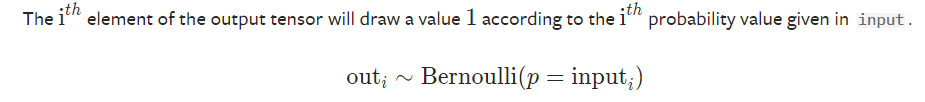



In [ ]:
# Example 2 - working
t5 = torch.tensor([[[.14,.67,.64],[.111,.23,.95]],[[.85,.15,.75],[.114,.89,.64]]])
torch.bernoulli(t5)

tensor([[[0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 1.],
         [0., 1., 1.]]])

- .64 has 0 and 1 also. Because the position also matters for bernoulli calculation.

In [ ]:
# Example 3 - breaking (to illustrate when it breaks)
t6 = torch.tensor(1)
torch.bernoulli(t6)

RuntimeError: ignored

- This is failed because 0 and 1 are not included/not acceptable as input elements.

- Whenever we required to use Bernoulli distribution in our models.

## floor
- Input and Output tensor shapes will be same.
- All element values inputs lowered to nearest integer.

In [ ]:
# Example 1 - working
t7 = torch.tensor([[1.2,3.7877,4.0111],[2,3,4]])
torch.floor(t7)

tensor([[1., 3., 4.],
        [2., 3., 4.]])

- Key note from the above example is whenter it is near/far from the lower interger, it always gives lower integer.
- 3.7877 to 3. & 4.0111 to 4.

In [ ]:
# Example 2 - working
t8 = torch.tensor([-2.63,1.999,-0.11,0.11])
torch.floor(t8)

tensor([-3.,  1., -1.,  0.])

- Observe for negative inputs also it is accepting and it's lowering.
- Keep in mind, 0.11 and -0.11 gives different values. Small errors in dataset will be amplified while using floor.

In [ ]:
# Example 3 - breaking (to illustrate when it breaks)
t9 = torch.tensor([[1,2],[3,4]])
torch.floor(t9)

RuntimeError: ignored

- Only floor input is accepted for floor operation and it always gives output in floor.

- Imagine your model predicting with 0 to 1 loss value, you can lower predictions to get exact answers.

## block_diag

- It takes bucnch of tensors and gives a tensor as output.
- All input tesnosrs are added as blocks and in diaglonal manner as the name.
- All remaining elements are filled with value 0.

In [ ]:
# Example 1 - working
t10 = torch.randn(3,2)
t11 = torch.rand(3,3)
t12 = torch.tensor([[1.,2.,5],[5,.2,6]])
torch.block_diag(t10,t11,t12)

tensor([[ 0.6683, -2.4404,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0850, -1.3259,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.2563, -0.1471,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.6030,  0.3668,  0.0807,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.4894,  0.1515,  0.2370,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0641,  0.8901,  0.2777,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  2.0000,  5.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  5.0000,  0.2000,  6.0000]])

- All tensors are added to form the output tensor with shape(8,8).

In [ ]:
# Example 2 - working
t13 = torch.tensor([[1,2.],[5,6]])
t14 = torch.tensor([[5,7],[6,8],[7,9]])
torch.block_diag(t13,t14)

tensor([[1., 2., 0., 0.],
        [5., 6., 0., 0.],
        [0., 0., 5., 7.],
        [0., 0., 6., 8.],
        [0., 0., 7., 9.]])

- If one input tensor is float type, Output tensor becomes of data type float.
- Observe shape of t13 is 2,2 and t14 is 3,2. output tensor shape is 5,4. 
- Shape of output is sum of respective levels of tesnosr input shapes.

In [ ]:
# Example 3 - breaking (to illustrate when it breaks)
t15 = torch.rand(1,2)
t16 = torch.randn(-1)
torch.block_diag(t15,t16)

RuntimeError: ignored

- It shouldn't produce output tensor with shape 2,1 for above example.
- Shape of a tensor cant be negative, at base level.

- Literally, I can't find a application with my current knowledge, but thinking it would be useful during multiplication of tensor (matrix multiplication

## Conclusion

Summarize what was covered in this notebook, and where to go next

## Reference Links
Provide links to your references and other interesting articles about tensors
* Official documentation for tensor operations: https://pytorch.org/docs/stable/torch.html
* ...